In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [4]:
DF = DF[DF['product'] == 'Money transfer']
DF

,consumer complaint narrative,product,issue
1227656,I am getting in touch with you because I have ...,Money transfer,Fraud or scam
1227657,"On XX/XX/XXXX, I did a XXXX search for Chime c...",Money transfer,Fraud or scam
1227658,"Claim Number : XXXX PLEASE HELP Dear Sir, PLEA...",Money transfer,Fraud or scam
1227659,My paypal account is stollen from some one els...,Money transfer,Fraud or scam
1227660,On XX/XX/2023 I wire transferred through Wells...,Money transfer,Other transaction problem
...,...,...,...
1248839,Nature of the dispute -- -- -- -- -- -- -- -- ...,Money transfer,Fraud or scam
1248840,"Hello, On Friday, XX/XX/2021, I received email...",Money transfer,Fraud or scam
1248841,Video consulting services were sold to an indi...,Money transfer,Fraud or scam
1248842,On XXXX XXXX XXXX my account was permanently l...,Money transfer,"Managing, opening, or closing your mobile wall..."


# 자연어처리

In [5]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
lower = [text.lower() for text in DF['narrative'].values]
DF['narrative'] = lower

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF["narrative"]=DF["narrative"].apply(lambda x: remove_stopwords(x))

DF.head()

,consumer complaint narrative,product,issue,narrative
1227656,I am getting in touch with you because I have ...,Money transfer,Fraud or scam,getting touch lost money account opened coinba...
1227657,"On XX/XX/XXXX, I did a XXXX search for Chime c...",Money transfer,Fraud or scam,search chime customer service clicked thought ...
1227658,"Claim Number : XXXX PLEASE HELP Dear Sir, PLEA...",Money transfer,Fraud or scam,claim number please help dear sir please help ...
1227659,My paypal account is stollen from some one els...,Money transfer,Fraud or scam,paypal account stollen one else stole account ...
1227660,On XX/XX/2023 I wire transferred through Wells...,Money transfer,Other transaction problem,2023 wire transferred wells fargo bank 1000000...


# 데이터 추출 및 컬럼명 변경

In [8]:
DF_test = DF[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
1227656,getting touch lost money account opened coinba...,Fraud or scam
1227657,search chime customer service clicked thought ...,Fraud or scam
1227658,claim number please help dear sir please help ...,Fraud or scam
1227659,paypal account stollen one else stole account ...,Fraud or scam
1227660,2023 wire transferred wells fargo bank 1000000...,Other transaction problem
...,...,...
1248839,nature dispute 2 accounts bank america checkin...,Fraud or scam
1248840,hello friday 2021 received emails someone name...,Fraud or scam
1248841,video consulting services sold individual paid...,Fraud or scam
1248842,account permanently limited paypal reason give...,"Managing, opening, or closing your mobile wall..."


# 데이터 분할

In [9]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(19069, 2) (19069,) (2119, 2) (2119,)


In [ ]:
x_train.head()

,text,label
1244089,2022 paypal permanently limited company compan...,"Managing, opening, or closing your mobile wall..."
1238772,received unemployment payment debit card issue...,Other transaction problem
1245416,went website make purchase checking looked nor...,Fraud or scam
1235026,may concern name victim fraudulent landlord co...,Fraud or scam
1231215,scammed person phone posed personnel said they...,Fraud or scam


In [ ]:
x_test

,text,label
1230040,opened new business account funded cashiers ch...,Fraud or scam
1247199,im guitar needed quality case vintage acoustic...,Fraud or scam
1230322,yesterday contact someone pretended famous rap...,Fraud or scam
1248766,hi sir name im united states rasident paypal c...,"Managing, opening, or closing your mobile wall..."
1246346,25000 sent account scammed account holding pos...,Fraud or scam
...,...,...
1228468,back 2019 several transfers instructed coinbas...,Fraud or scam
1244159,incident started sale used home oil furnace li...,Fraud or scam
1241939,wed initiated payment citizens bank checking a...,Other transaction problem
1234351,purchased via paypal vendor sent email refunde...,Fraud or scam


# 데이터셋 만들기




In [10]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/19069 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/2119 [00:00<?, ? examples/s]

In [11]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 19069
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 2119
    })
})

# 토큰화

In [12]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [13]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [14]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [15]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/19069 [00:00<?, ? examples/s]

Map:   0%|          | 0/2119 [00:00<?, ? examples/s]

# 패딩?

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True,max_length = 128)

# 성능평가 함수

In [16]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 모델

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=3).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
tokenized_corpus["validation"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Fraud or scam', 'Managing, opening, or closing your mobile wallet account', 'Other transaction problem'], id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

# 빠인뜌닝

In [ ]:
training_args = TrainingArguments(
    output_dir="best_model_Money_transfer",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model()

{'loss': 0.6625, 'grad_norm': 5.607223033905029, 'learning_rate': 1.720357941834452e-05, 'epoch': 0.41946308724832215}
{'loss': 0.5647, 'grad_norm': 10.255230903625488, 'learning_rate': 1.4407158836689039e-05, 'epoch': 0.8389261744966443}
{'eval_loss': 0.5648828148841858, 'eval_accuracy': 0.7659273242095328, 'eval_runtime': 45.7218, 'eval_samples_per_second': 46.346, 'eval_steps_per_second': 2.909, 'epoch': 1.0}
{'loss': 0.5085, 'grad_norm': 8.313735008239746, 'learning_rate': 1.1610738255033558e-05, 'epoch': 1.2583892617449663}
{'loss': 0.5059, 'grad_norm': 18.695703506469727, 'learning_rate': 8.814317673378077e-06, 'epoch': 1.6778523489932886}
{'eval_loss': 0.5328927636146545, 'eval_accuracy': 0.7697026899480888, 'eval_runtime': 45.4182, 'eval_samples_per_second': 46.655, 'eval_steps_per_second': 2.928, 'epoch': 2.0}
{'loss': 0.4618, 'grad_norm': 10.170548439025879, 'learning_rate': 6.0178970917225955e-06, 'epoch': 2.097315436241611}
{'loss': 0.4238, 'grad_norm': 12.979757308959961, 

In [ ]:
pred_output = trainer.predict(tokenized_corpus["validation"])
pred_output

PredictionOutput(predictions=array([[ 1.1042219 , -0.91470134,  0.27756613],
       [ 3.7382524 , -2.8390918 , -0.48795956],
       [ 2.994711  , -2.1344197 , -0.4753728 ],
       ...,
       [ 0.01249133, -2.905357  ,  2.8229163 ],
       [ 1.540888  , -2.1775317 ,  1.2929859 ],
       [ 3.1693654 , -3.218289  ,  0.8254709 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 2, 0, 2]), metrics={'test_loss': 0.5098915696144104, 'test_accuracy': 0.7909391222274658, 'test_runtime': 47.4801, 'test_samples_per_second': 44.629, 'test_steps_per_second': 2.801})

In [ ]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

In [ ]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(2119,)
Predictions: [0 0 0 ... 2 0 0]


In [ ]:
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

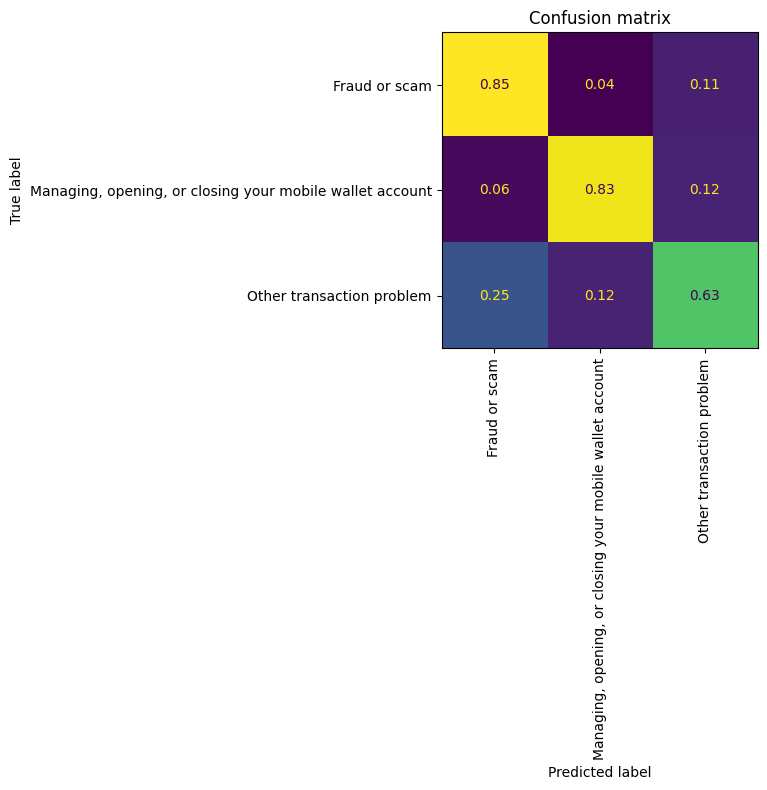

In [ ]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [17]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/best_model_Money_transfer")


# TrainingArguments
eval_args = TrainingArguments(
    output_dir="result",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

# Trainer
trainer = Trainer(
    model= model,
    args=eval_args,
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # 사용자가 정의한 평가 지표 함수
)

eval_result = trainer.evaluate()

{'eval_loss': 0.4162140190601349, 'eval_accuracy': 0.8352996696554978, 'eval_runtime': 42.6076, 'eval_samples_per_second': 49.733, 'eval_steps_per_second': 3.122}
